In [ ]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
import os

In [ ]:
num_classes =  5
img_rows,img_cols = 48,48
batch_size = 32

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data_dir='/content/drive/MyDrive/FER2013FIX/train'
validation_data_dir='/content/drive/MyDrive/FER2013FIX/validation'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    width_shift_range=0.4,
    height_shift_range=0.4,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='rgb',
					target_size=(img_rows,img_cols),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='rgb',
							target_size=(img_rows,img_cols),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)

Found 24256 images belonging to 5 classes.
Found 3006 images belonging to 5 classes.


In [ ]:
from keras.applications import vgg16
from keras.models import Model
import keras


vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=(48,48,3))

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False
    
import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])    

58892288/58889256 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f9efb996dd0>,input_1,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9efb9093d0>,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9efd9d4bd0>,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f9efcef2210>,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9efcf00e90>,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9efcdba9d0>,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f9efe196350>,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9efe1f1ad0>,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9efe240190>,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9efe2836d0>,block3_conv3,False


In [ ]:
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])       

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f9efb996dd0>,input_1,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9efb9093d0>,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9efd9d4bd0>,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f9efcef2210>,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9efcf00e90>,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9efcdba9d0>,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f9efe196350>,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9efe1f1ad0>,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9efe240190>,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9efe2836d0>,block3_conv3,False


In [ ]:
model = Sequential()

In [ ]:
model.add(vgg_model)

In [ ]:


#Block-6

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#Block-7

model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
_________________________________________________________________
activation_1 (Activation)    (None, 5)                 0

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('EmotionDetectionModelVGG16FineTune.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop,checkpoint,reduce_lr]

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

nb_train_samples = 24256
nb_validation_samples = 3006
epochs=25

history=model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=nb_validation_samples//batch_size)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
758/758 [==============================] - 2260s 3s/step - loss: 1.4927 - accuracy: 0.3298 - val_loss: 1.6791 - val_accuracy: 0.3058

Epoch 00001: val_loss improved from inf to 1.67908, saving model to EmotionDetectionModelVGG16FineTune.h5
Epoch 2/25
758/758 [==============================] - 1671s 2s/step - loss: 1.4521 - accuracy: 0.3592 - val_loss: 1.4796 - val_accuracy: 0.3747

Epoch 00002: val_loss improved from 1.67908 to 1.47957, saving model to EmotionDetectionModelVGG16FineTune.h5
Epoch 3/25
758/758 [==============================] - 1666s 2s/step - loss: 1.4397 - accuracy: 0.3680 - val_loss: 1.4400 - val_accuracy: 0.3837

Epoch 00003: val_loss improved from 1.47957 to 1.44001, saving model to EmotionDetectionModelVGG16FineTune.h5
Epoch 4/25
758/758 [==============================] - 1669s 2s/step - loss: 1.4331 - accuracy: 0.3687 - val_loss: 1.4753 - val_accuracy: 0.3915

Epoch 00004: val_loss did not improve from 1.44001
Epoch 5/25
758/758 [=======================

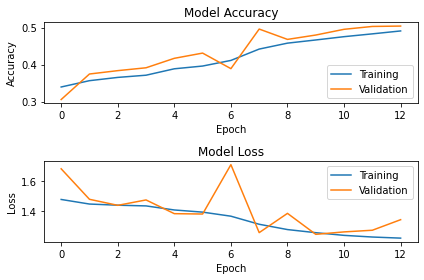

In [17]:
import matplotlib.pyplot as plt
plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/EmotDetectWithVGG16.h5')

In [18]:
nb_train_samples = 2534
nb_validation_samples = 3006
epochs=25

In [19]:
import numpy as np
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[ 44 149  77 143  78]
 [136 267 126 241 109]
 [ 85 184 107 166  84]
 [ 90 191  83 152  78]
 [ 57 104  67 128  60]]


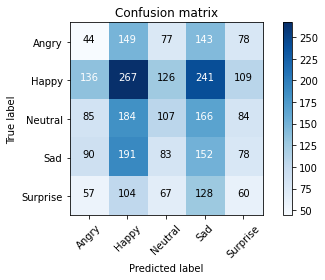

Classification Report
              precision    recall  f1-score   support

       Angry       0.11      0.09      0.10       491
       Happy       0.30      0.30      0.30       879
     Neutral       0.23      0.17      0.20       626
         Sad       0.18      0.26      0.21       594
    Surprise       0.15      0.14      0.15       416

    accuracy                           0.21      3006
   macro avg       0.19      0.19      0.19      3006
weighted avg       0.21      0.21      0.21      3006



In [20]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


print('Confusion Matrix')
y_true = validation_generator.classes
y_pred = y_pred
cm = confusion_matrix(y_true, y_pred)
labels = ['Angry','Happy', 'Neutral', 'Sad', 'Surprise']
title='Confusion matrix'
print(cm)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()
print('Classification Report')
target_names = ['Angry','Happy','Neutral','Sad','Surprise']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))